## Apress - Industrialized Machine Learning Examples

Andreas Francois Vermeulen
2019

### This is an example add-on to a book and needs to be accepted as part of that copyright.

# Chapter-006-001C-k-Nearest-Neighbor

In [1]:
from sklearn.neighbors import NearestNeighbors
import sklearn.neighbors as skn
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from random import sample
import matplotlib._color_data as mcd

In [2]:
ncnt1=4
ncnt2=8

In [3]:
np.random.seed(1968)
nrcnt=50
bdisplay=True

In [4]:
colors1 = np.array(list(sorted({name for name in mcd.CSS4_COLORS if "xkcd:" + name in mcd.XKCD_COLORS}, reverse=False)))
colors=np.random.choice(colors1,nrcnt)
if bdisplay:
    print(colors)

['gold' 'maroon' 'red' 'aqua' 'orangered' 'orangered' 'yellowgreen'
 'sienna' 'darkblue' 'silver' 'lavender' 'lightgreen' 'silver' 'red'
 'aqua' 'khaki' 'darkgreen' 'fuchsia' 'turquoise' 'goldenrod' 'red' 'navy'
 'khaki' 'ivory' 'fuchsia' 'magenta' 'aqua' 'olive' 'teal' 'red' 'silver'
 'magenta' 'tomato' 'coral' 'gold' 'olive' 'khaki' 'violet' 'beige'
 'goldenrod' 'tomato' 'red' 'goldenrod' 'salmon' 'azure' 'aquamarine'
 'ivory' 'navy' 'lavender' 'chocolate']


In [5]:
fileName = '../../Data/Postcodes002.csv'
fileFullName = os.path.abspath(fileName)
print(fileFullName)

C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Data\Postcodes002.csv


In [6]:
datarawdf = pd.read_csv(fileFullName, header=0)
print(datarawdf.shape)
print(datarawdf.columns)

(43191, 7)
Index(['Zip', 'City', 'State', 'Latitude', 'Longitude', 'Timezone',
       'Daylight savings time flag'],
      dtype='object')


In [7]:
indices = np.random.randint(0,datarawdf.shape[0],nrcnt)
datadf=datarawdf.loc[indices]
if bdisplay:
    print(datadf[['Zip','City','State','Latitude','Longitude']])

         Zip                 City State   Latitude   Longitude
4198   37061                 Erin    TN  36.301089  -87.681980
3521   61601               Peoria    IL  40.693137  -89.589847
16683  47405          Bloomington    IN  39.173447  -86.515145
27551  26531             Dellslow    WV  39.607447  -79.890120
1769   68792                Wynot    NE  42.749481  -97.143720
26269  70642            Fullerton    LA  31.111979  -93.200936
4754    2894  Wood River Junction    RI  41.444078  -71.695560
9709   39631          Centreville    MS  31.078189  -91.077230
40101    690          San Antonio    PR  18.495369  -67.098670
37833  15558            Salisbury    PA  39.742872  -79.086800
32598  35811           Huntsville    AL  34.781080  -86.531630
28233  49088               Scotts    MI  42.187577  -85.426210
27653  84151       Salt Lake City    UT  40.668068 -111.908297
58     53006          Brownsville    WI  43.623996  -88.510890
42358  98541                 Elma    WA  47.035750 -123

In [8]:
Xdf = datadf[['Latitude', 'Longitude']].copy(deep=True)
Xdf.columns = ['latitude', 'longitude']
if bdisplay:
    print(Xdf.shape)
    print(Xdf.columns)

(50, 2)
Index(['latitude', 'longitude'], dtype='object')


In [9]:
nbrs1 = NearestNeighbors(n_neighbors=ncnt1,
                         algorithm='auto',
                         n_jobs=-1,
                         metric='l2'                         
                       ).fit(Xdf)

distances1, indices1 = nbrs1.kneighbors(Xdf)

n1=nbrs1.kneighbors_graph(Xdf).toarray()

In [10]:
if bdisplay:
    print('Indices')
    print('---------------')
    print(indices1)
    print('Distances')
    print('---------------')
    print(distances1)

    print('K-neighbors')
    print('---------------')
    print(n1)

Indices
---------------
[[ 0 36 43 10]
 [ 1 31 35 13]
 [ 2 43 26 35]
 [ 3  9 17 38]
 [ 4 40 34  1]
 [ 5 27  7 37]
 [ 6 41 45 22]
 [ 7 27  5 37]
 [ 8 15 39 25]
 [ 9  3 17 38]
 [10 36  0 43]
 [11 26 32 35]
 [12 30 21 20]
 [13 35 31  1]
 [14 23 48 12]
 [15  8 39 25]
 [16 24 42 44]
 [17 38  9  3]
 [18 26 49 11]
 [19 28 10 44]
 [20 46 30 12]
 [21 30 12  4]
 [22 38 17 41]
 [23 14 48 12]
 [24 45 33 47]
 [25 39 28 19]
 [26 11 18 32]
 [27  7  5 37]
 [28 19 44 25]
 [29 38 17  3]
 [30 46 20 21]
 [31  1 35  2]
 [32 11 26 18]
 [33 47 45  9]
 [34  4 40 13]
 [35 31 26 11]
 [36  0 10 43]
 [37  5 27  7]
 [38 17 29  9]
 [39 25 28 19]
 [40  4  1 31]
 [41  6 22 45]
 [42 49  3 44]
 [43  2  0 36]
 [44 28 10 42]
 [45 47 33 24]
 [46 20 30 12]
 [47 33 45  9]
 [48 14 23 12]
 [49 18  3 42]]
Distances
---------------
[[ 0.          0.53058336  1.8108203   1.90623516]
 [ 0.          0.71275635  2.29749313  3.12315268]
 [ 0.          1.70635451  2.47553861  2.55663542]
 [ 0.          0.81465511  1.80768295  2.18430

In [11]:
X = np.array(Xdf['latitude']).reshape(1,-1).T
if bdisplay:
    print(X.shape)

(50, 1)


In [12]:
Y = np.array(Xdf['longitude']).reshape(1,-1).T
if bdisplay:
    print(Y.shape)

(50, 1)


In [13]:
xmin=np.floor(min(X))
xmax=np.ceil(max(X))
ymin=np.floor(min(Y))
ymax=np.ceil(max(Y))
print(xmin,xmax,ymin,ymax)

[18.] [49.] [-124.] [-66.]


In [14]:
if n1.shape[0] > colors.shape[0]:
    step=int(np.ceil(n1.shape[0]/colors.shape[0]))
else:
    step=1

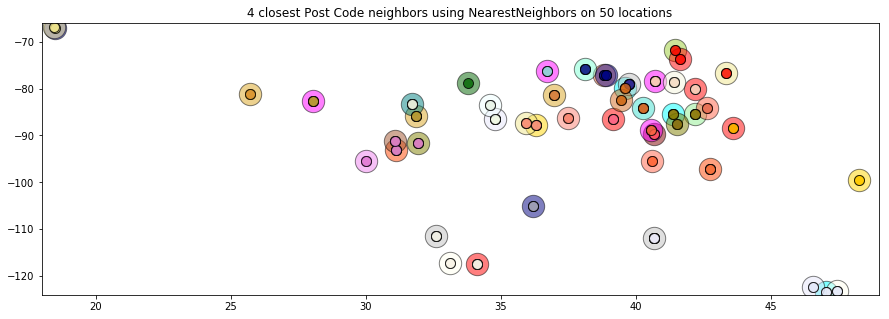

In [15]:
fig1=plt.figure(figsize=(15, 5))
titlename = '%d closest Post Code neighbors using NearestNeighbors on %d locations' % (ncnt1, nrcnt)
plt.title(titlename)

k=-1
for p in range(0,n1.shape[0],step):  
    l=n1[p]
    k+=1
    c=colors[k]
    plt.scatter(X[p], 
                Y[p], 
                marker='o', 
                s=500,
                alpha=0.5, 
                edgecolors='k',
                antialiased=True,
                c=c
               )
    for i in range(l.shape[0]):
        if l[i] == 1:
            plt.scatter(X[i], 
                        Y[i], 
                        marker='o', 
                        s=100, 
                        alpha=0.8, 
                        edgecolors='k',
                        antialiased=True,
                        c=c
                       )
            plt.plot(X[p],X[i], 
                     Y[p],Y[i],
                     c=c,
                     alpha=1.0,
                     antialiased=True,
                     linestyle='--',
                     linewidth=3
                    )

plt.axis([xmin,xmax,ymin,ymax])
#plt.autoscale(enable=True, axis='x', tight=False)
plt.show()

In [16]:
nbrs2 = NearestNeighbors(n_neighbors=ncnt2, 
                        algorithm='auto',
                         n_jobs=-1,
                         metric='l2'            
                       ).fit(X)

distances2, indices2 = nbrs2.kneighbors(X)

n2=nbrs2.kneighbors_graph(X).toarray()

In [17]:
if bdisplay:
    print('Indices')
    print('---------------')
    print(indices2)
    print('Distances')
    print('---------------')
    print(distances2)

    print('K-neighbors')
    print('---------------')
    print(n2)

Indices
---------------
[[ 0 21 36 24 42 43 10 44]
 [ 1 17 12 40 31 18 26 38]
 [ 2 47 49 33  3  9 45 18]
 [ 3  9 49  2 18 47 33 31]
 [ 4 32 11 29 22 13 41 35]
 [ 5  7 28 19 27 37 30 46]
 [ 6 38 26 35 41 17 29 11]
 [ 7  5 28 19 27 37 30 46]
 [ 8 15 39 25 37  7  5 28]
 [ 9  3 49 18  2 31 47 40]
 [10 44 20 16 36 21  0 46]
 [11 29 32 41  4 35  6 38]
 [12  1 17 40 31 18 26 38]
 [13 22  4 32 11 29 41 35]
 [14 23 48 34 13 22  4 32]
 [15  8 39 25 37  7  5 28]
 [16 20 46 44 10 30 27 19]
 [17  1 12 40 31 18 26 38]
 [18 31 40 12  1 17  9  3]
 [19 27 28  5 30  7 46 37]
 [20 16 44 10 46 30 36 21]
 [21  0 36 24 42 43 10 44]
 [22 13  4 32 11 29 41 35]
 [23 14 34 48 13 22  4 32]
 [24 42  0 21 36 43 45 10]
 [25 37 39  7  5 28 19 27]
 [26 38  6 35 41 17  1 12]
 [27 19 28 30  5  7 46 16]
 [28 19 27  5  7 30 46 37]
 [29 11 32 41  4 35  6 38]
 [30 46 27 19 28 16 20  5]
 [31 40 12  1 17 18 26  9]
 [32  4 11 29 22 13 41 35]
 [33 47  2 49 45  3  9 43]
 [34 23 14 48 13 22  4 32]
 [35  6 41 38 26 29 11 17]
 [36

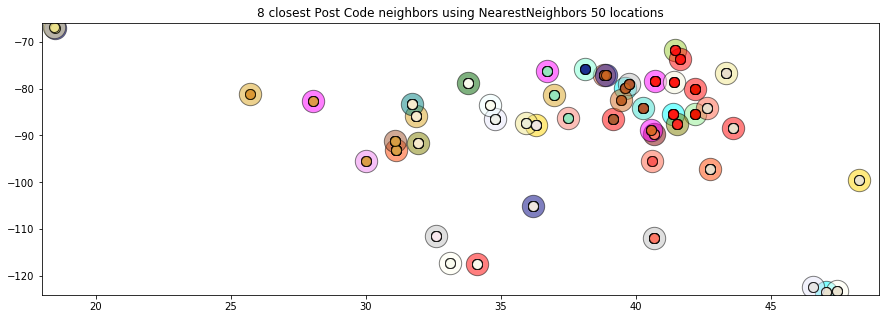

In [18]:
fig2=plt.figure(figsize=(15, 5))
titlename = '%d closest Post Code neighbors using NearestNeighbors %d locations' % (ncnt2, nrcnt)
plt.title(titlename)
k=-1
for p in range(0,n2.shape[0],step): 
    l=n2[p]
    k+=1
    c=colors[k]
    plt.scatter(X[p], 
                Y[p], 
                marker='o', 
                s=500,
                alpha=0.5, 
                edgecolors='k',
                antialiased=True,
                c=c
               )
    for i in range(l.shape[0]):
        if l[i] == 1:
            plt.scatter(X[i], 
                        Y[i], 
                        marker='o', 
                        s=100, 
                        alpha=0.8, 
                        edgecolors='k',
                        antialiased=True,
                        c=c
                       )
            plt.plot(X[p],X[i], 
                     Y[p],Y[i],
                     c=c,
                     alpha=0.6,
                     antialiased=True,
                     linestyle='--',
                     linewidth=3
                    )

plt.axis([xmin,xmax,ymin,ymax])
#plt.autoscale(enable=True, axis='x', tight=False)
plt.show()

In [19]:
imagepath = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 06'])
print(imagepath)

if not os.path.exists(imagepath):
    os.makedirs(imagepath)
    
imagename = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 06','Chapter-006-Example-001C-01.jpg'])
fig1.savefig(imagename, bbox_inches='tight')     
imagename = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 06','Chapter-006-Example-001C-02.jpg'])
fig2.savefig(imagename, bbox_inches='tight') 

C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Results\Chapter 06


## Done

In [20]:
import datetime
now = datetime.datetime.now()
print('Done!',str(now))

Done! 2019-04-19 08:27:48.713536
